In [2]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import scipy
import math

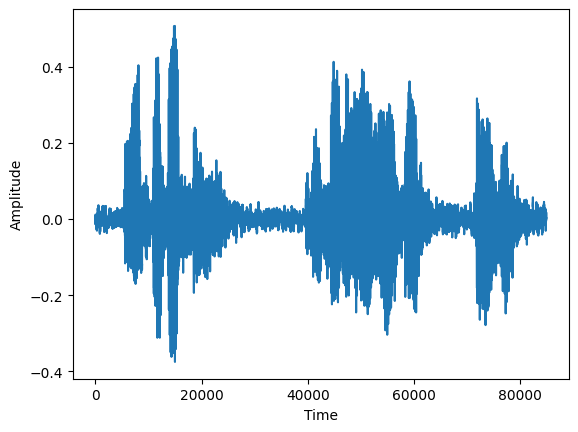

In [4]:
y, sr = librosa.load('a.wav')
y = y[0:88200]

# plot amplitude vs time in seconds
plt.plot(y)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

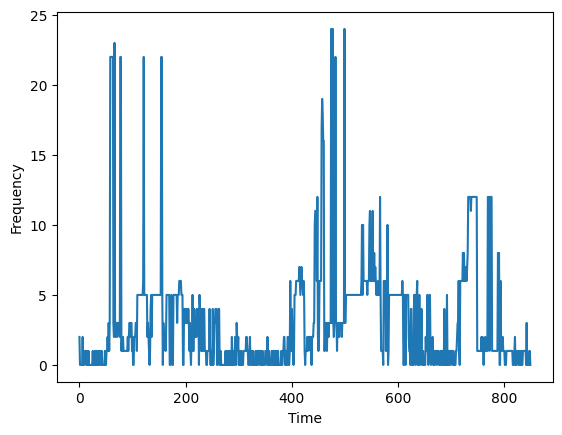

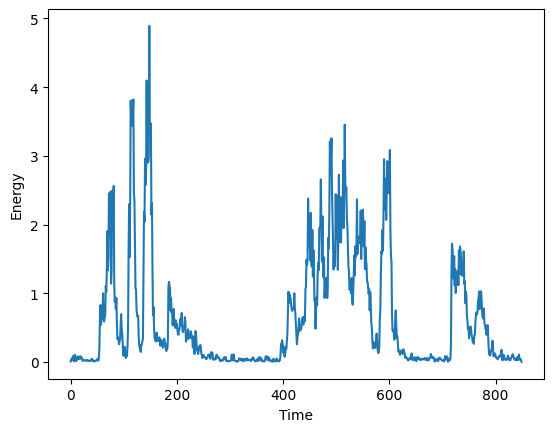

In [37]:
# short time energy
def short_time_energy(y, frame_size, hop_size):
    energy = []
    for i in range(0, len(y), hop_size):
        frame = y[i:i+frame_size]
        energy.append(sum(frame**2))
    return energy

# most dominant frequency
def most_dominant_frequency(y, frame_size, hop_size):
    freq = []
    for i in range(0, len(y), hop_size):
        frame = y[i:i+frame_size]
        ff=abs(scipy.fft.fft(frame))
        freq.append(ff.argmax())
    return freq

most = most_dominant_frequency(y, 200, 100)
plt.plot(most)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

energy=short_time_energy(y, 200, 100)
plt.plot(energy)
plt.xlabel('Time')
plt.ylabel('Energy')
plt.show()

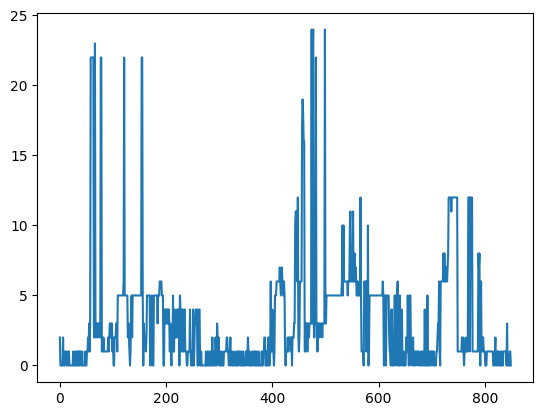

In [57]:
# Fundamental Frequency contour

def fundamental_frequency(y, frame_size, hop_size):
    freq = []
    for i in range(0, len(y), hop_size):
        frame = y[i:i+frame_size]
        ff=abs(scipy.fft.fft(frame))
        freq.append(ff.argmax())
    return freq

freq = fundamental_frequency(y, 200, 100)
plt.plot(freq)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()



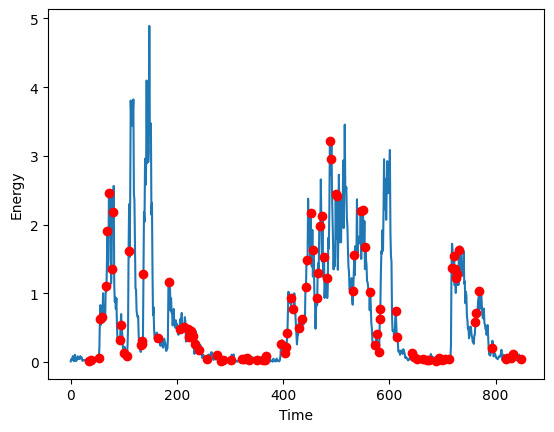

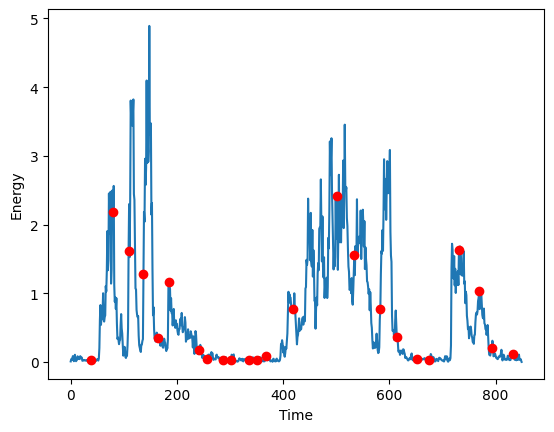

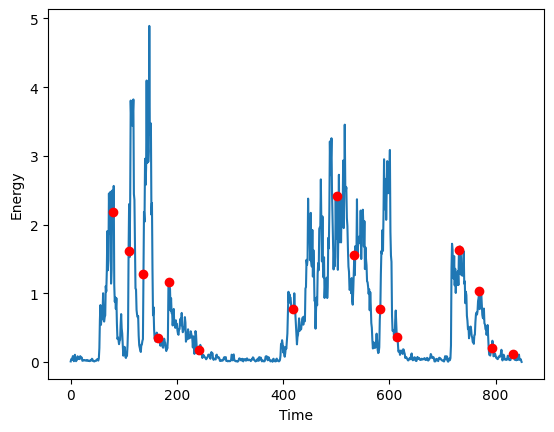

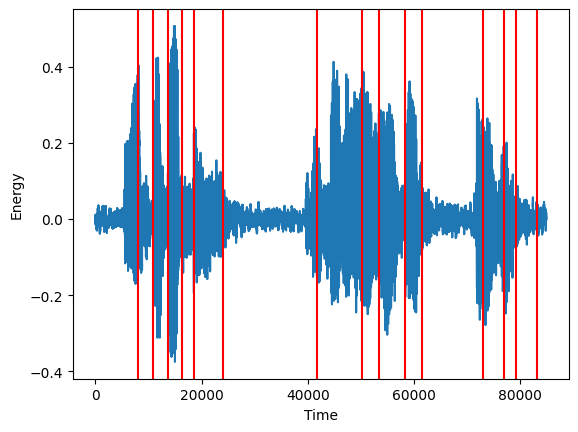

In [79]:
# detect vowel onset points
def detect_vowel_onset_points(energy, freq):
    vowel_onset_points = []
    for i in range(1, len(energy)):
        if energy[i] > energy[i-1] and freq[i] > freq[i-1]:
            vowel_onset_points.append(i)
    return vowel_onset_points

vowel_onset_points = detect_vowel_onset_points(energy, freq)
# plot vowel onset points
plt.plot(energy)
plt.plot(vowel_onset_points, [energy[i] for i in vowel_onset_points], 'ro')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.show()

# remove vowel onset points that are too close to each other
def remove_close_vowel_onset_points(vowel_onset_points, min_distance):
    new_vowel_onset_points = []
    for i in range(1, len(vowel_onset_points)):
        if vowel_onset_points[i] - vowel_onset_points[i-1] > min_distance:
            new_vowel_onset_points.append(vowel_onset_points[i-1])
    return new_vowel_onset_points
    
vowel_onset_points = remove_close_vowel_onset_points(vowel_onset_points, 10)
# plot vowel onset points
plt.plot(energy)
plt.plot(vowel_onset_points, [energy[i] for i in vowel_onset_points], 'ro')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.show()

# remove vowel onset points in low energy regions
def remove_vowel_onset_points_in_low_energy_regions(vowel_onset_points, energy, min_energy):
    new_vowel_onset_points = []
    for i in range(len(vowel_onset_points)):
        if energy[vowel_onset_points[i]] > min_energy:
            new_vowel_onset_points.append(vowel_onset_points[i])
    return new_vowel_onset_points

vowel_onset_points = remove_vowel_onset_points_in_low_energy_regions(vowel_onset_points, energy, 0.1)
# plot vowel onset points
plt.plot(energy)
plt.plot(vowel_onset_points, [energy[i] for i in vowel_onset_points], 'ro')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.show()

# plot vowel boundary lines
plt.plot(y)

for i in range(len(vowel_onset_points)):
    plt.axvline(x=vowel_onset_points[i]*100, color='r')

plt.xlabel('Time')
plt.ylabel('Energy')
plt.show()
